In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

### The following data sets are available
1.   meta data of type .json
2.   phone data of type .csv

The meta data holds information from sellers point of view and the phone data holds user information. 
We begin by unzipping the meta data file and extracting its content to a list


In [4]:
# Reading the meta data
# importing libraries

import gzip
import shutil


In [6]:
#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/Web and social media analytics/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/MyDrive/Web and social media analytics/meta_Cell_Phones_and_Accessories.json'
# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [ ]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [ ]:
df_meta=pd.read_csv('/content/drive/MyDrive/Web and social media analytics/Capstone/meta.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_phonedata=pd.read_csv('/content/drive/MyDrive/Web and social media analytics/Capstone/phone_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data pre-processing



In [ ]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [ ]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1128437 non-null  int64  
 1   overall           1128437 non-null  float64
 2   verified          1128437 non-null  bool   
 3   reviewerID        1128437 non-null  object 
 4   asin              1128437 non-null  object 
 5   style             605241 non-null   object 
 6   reviewerName      1128281 non-null  object 
 7   reviewText        1127669 non-null  object 
 8   summary           1127912 non-null  object 
 9   unixReviewTime    1128437 non-null  int64  
 10  vote              92034 non-null    object 
 11  image             27107 non-null    object 
 12  review_sentiment  1128437 non-null  object 
 13  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 113.0+ MB


In [ ]:
df_phonedata.isnull().sum()

Unnamed: 0                0
overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
Date&Time                 0
dtype: int64

In [ ]:
df_phonedata=df_phonedata[~df_phonedata['style'].isnull()]

In [ ]:
df_phonedata.isnull().sum()

Unnamed: 0               0
overall                  0
verified                 0
reviewerID               0
asin                     0
style                    0
reviewerName            80
reviewText             435
summary                322
unixReviewTime           0
vote                557363
image               589137
review_sentiment         0
Date&Time                0
dtype: int64

In [ ]:
df_phonedata.drop(['vote','image','unixReviewTime'], axis = 1, inplace = True)

In [ ]:
df_phonedata.head()

,Unnamed: 0,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time
0,0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03
226,226,5.0,True,A1TNHWAM2GJ08G,961301375X,{'Color:': ' White'},P. Latella,this charger is amazing. Fantastic long cord a...,Perfect works great,POSITIVE,2014-02-10
227,227,5.0,True,AXGPQOWI0CF39,961301375X,{'Color:': ' White'},TimB.,I am very satisfied with this product! It came...,Very Nice Looking Item!,POSITIVE,2014-01-31
228,228,5.0,True,A1SI6TJGULNBSM,961301375X,{'Color:': ' White'},Reashea Thigpen,"It works good, the light is quite bright, but ...","It works good, the light is quite bright",POSITIVE,2015-01-07
229,229,1.0,True,A1KGX6ZUP9BVIZ,961301375X,{'Color:': ' White'},h l m,waste of time and money. Light stays on but it...,One Star,POSITIVE,2014-12-13


In [ ]:
df_meta.head()

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,0,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,Trollies Sing a Long Party VHS,[],[],NaN,NaN,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,NaN,NaN,NaN,6303195164
1,1,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,La Pura VHS,[],[],NaN,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,NaN,NaN,NaN,630524412X
2,2,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['New items to give you a new good mood, welco...",NaN,Leopard Thanksgiving Easter PC Black Case for ...,[],[],NaN,NaN,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,NaN,NaN,NaN,6310200240
3,3,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,Puppies Faceplate Hard Case Protector for Net1...,[],[],NaN,Live2Pedal,['Protect your phone with style through this A...,"['>#6,368,825 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501710
4,4,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,White Wolf Faceplate Protector Hard Case for S...,[],[],NaN,wirelessoutletusa,['Protect your phone with style through this A...,"['>#2,672,454 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501273


In [ ]:
df_meta.describe()

,Unnamed: 0
count,590071.000000
mean,295035.000000
std,170338.969683
min,0.000000
25%,147517.500000
50%,295035.000000
75%,442552.500000
max,590070.000000


In [ ]:
df_meta.drop_duplicates(subset='asin',inplace=True)

In [ ]:
mask=df_meta["category"].apply(lambda x:x[31:35]=="Cell")

In [ ]:
df_meta=df_meta[mask]

In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 36 to 590019
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    9789 non-null   int64 
 1   category      9789 non-null   object
 2   tech1         31 non-null     object
 3   description   9789 non-null   object
 4   fit           0 non-null      object
 5   title         9789 non-null   object
 6   also_buy      9789 non-null   object
 7   image         9789 non-null   object
 8   tech2         9 non-null      object
 9   brand         9666 non-null   object
 10  feature       9789 non-null   object
 11  rank          9789 non-null   object
 12  also_view     9789 non-null   object
 13  details       9789 non-null   object
 14  main_cat      9775 non-null   object
 15  similar_item  2933 non-null   object
 16  date          236 non-null    object
 17  price         1743 non-null   object
 18  asin          9789 non-null   object
dtypes: 

In [ ]:
df_meta.isnull().sum()

Unnamed: 0         0
category           0
tech1           9758
description        0
fit             9789
title              0
also_buy           0
image              0
tech2           9780
brand            123
feature            0
rank               0
also_view          0
details            0
main_cat          14
similar_item    6856
date            9553
price           8046
asin               0
dtype: int64

In [ ]:
df_meta.drop(['tech1','tech2','fit','date'], axis = 1, inplace = True)

In [ ]:
df_meta.price.value_counts()

$40.08                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
df_meta1=df_meta[~df_meta['price'].isna()]
df_meta1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 1494 to 589618
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1743 non-null   int64 
 1   category      1743 non-null   object
 2   description   1743 non-null   object
 3   title         1743 non-null   object
 4   also_buy      1743 non-null   object
 5   image         1743 non-null   object
 6   brand         1725 non-null   object
 7   feature       1743 non-null   object
 8   rank          1743 non-null   object
 9   also_view     1743 non-null   object
 10  details       1743 non-null   object
 11  main_cat      1742 non-null   object
 12  similar_item  1327 non-null   object
 13  price         1743 non-null   object
 14  asin          1743 non-null   object
dtypes: int64(1), object(14)
memory usage: 217.9+ KB


In [ ]:
df_meta1=df_meta1[~df_meta1['similar_item'].isna()]
df_meta1.head()

,Unnamed: 0,category,description,title,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price,asin
2925,2925,"['Cell Phones & Accessories', 'Cell Phones', '...","['An entry level handset with a clean, stylish...",Virgin Mobile Shorty Phone- Blue,[],['https://images-na.ssl-images-amazon.com/imag...,Nokia,[],"['>#436,771 in Cell Phones & Accessories (See ...","['B002ZNJGU0', 'B00O5EUBSI', 'B0757B64H2', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",.a-box-inner{background-color:#fff}#alohaBuyBo...,B0009EP76Y
3234,3234,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Get more with this digital camera phone by u...",Verizon or PagePlus LG VX5200 Great Condition ...,['B004GK67UW'],['https://images-na.ssl-images-amazon.com/imag...,LG,[],"['>#508,503 in Cell Phones & Accessories (See ...","['B01DRV2BBY', 'B07BHH848H', 'B01DRV2B2I', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",.a-box-inner{background-color:#fff}#alohaBuyBo...,B000BH9V0M
3278,3278,"['Cell Phones & Accessories', 'Cell Phones', '...",['The i-mate Jam is the smallest integrated Wi...,i-mate Jam Unlocked Smartphone with MP3/Video ...,[],[],I-MATE,[],"['>#5,706,812 in Cell Phones & Accessories (Se...","['B01EVPHQT2', 'B0749Y4TXV', 'B01M24QYPN', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",.a-box-inner{background-color:#fff}#alohaBuyBo...,B000BNGZOG
4018,4018,"['Cell Phones & Accessories', 'Cell Phones', '...",['The Nokia 1100 phone lets you conduct busine...,Unlocked Nokia 1100,"['B00095MR5W', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,Nokia,['Unlocked Nokia 1100'],"['>#510,212 in Cell Phones & Accessories (See ...","['B075FL4H89', 'B0757B64H2', 'B0757BT4C8', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$40.08,B000FJ1XWA
4130,4130,"['Cell Phones & Accessories', 'Cell Phones', '...",['Like new in box great looking phone get it b...,Motorola Moto Q - Smartphone - CDMA2000 1X - b...,[],['https://images-na.ssl-images-amazon.com/imag...,Motorola,[],"['>#503,104 in Cell Phones & Accessories (See ...","['B014VM1CYU', 'B00O5EU7TQ', 'B00NSRC4Y2', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$17.99,B000FYU4SO


In [ ]:
df_meta1=df_meta1[~df_meta1['brand'].isna()]
df_meta1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 2925 to 589618
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1321 non-null   int64 
 1   category      1321 non-null   object
 2   description   1321 non-null   object
 3   title         1321 non-null   object
 4   also_buy      1321 non-null   object
 5   image         1321 non-null   object
 6   brand         1321 non-null   object
 7   feature       1321 non-null   object
 8   rank          1321 non-null   object
 9   also_view     1321 non-null   object
 10  details       1321 non-null   object
 11  main_cat      1321 non-null   object
 12  similar_item  1321 non-null   object
 13  price         1321 non-null   object
 14  asin          1321 non-null   object
dtypes: int64(1), object(14)
memory usage: 165.1+ KB


In [ ]:
df_meta1.to_csv('/content/drive/MyDrive/Web and social media analytics/Capstone/final_meta1.csv')

In [ ]:
df_meta=pd.read_csv('/content/drive/MyDrive/Web and social media analytics/Capstone/final_meta1.csv')

In [ ]:
df_meta=pd.read_csv('/content/drive/MyDrive/Web and social media analytics/Capstone/final_meta1.csv')

In [ ]:
 reviews = pd.merge(df_phonedata, df_meta, how="inner", on=["asin"])

In [ ]:
reviews.head()

,Unnamed: 0_x,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0_y,Unnamed: 0.1,category,description,title,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price
0,21613,4.0,False,A1ICOB5XZ9GK3R,B002KQLUVU,{'Color:': ' Black'},pinknblu,"I gave it a four because when I first got it, ...",Blackberry Rim 8520,POSITIVE,2009-09-06,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
1,21614,5.0,True,A2O0XNK7T4KASU,B002KQLUVU,{'Color:': ' Black'},JR,Good,Good,POSITIVE,2017-08-17,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
2,21615,5.0,True,A3CB1J66JA929L,B002KQLUVU,{'Color:': ' Black'},Idelfonzo,ok,Five Stars,POSITIVE,2017-07-14,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
3,21616,5.0,True,A1H8OJ4PPV9R12,B002KQLUVU,{'Color:': ' Black'},Daniel Garanton.,Excelente!,Five Stars,NEGATIVE,2017-02-16,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
4,21617,1.0,True,A2H6U09YBWFYPJ,B002KQLUVU,{'Color:': ' Black'},Donysius R.,unhappy with the product ... is not what I wan...,One Star,NEGATIVE,2016-12-24,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11037
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0_x      11038 non-null  int64  
 1   overall           11038 non-null  float64
 2   verified          11038 non-null  bool   
 3   reviewerID        11038 non-null  object 
 4   asin              11038 non-null  object 
 5   style             11038 non-null  object 
 6   reviewerName      11036 non-null  object 
 7   reviewText        11024 non-null  object 
 8   summary           11032 non-null  object 
 9   review_sentiment  11038 non-null  object 
 10  Date&Time         11038 non-null  object 
 11  Unnamed: 0_y      11038 non-null  int64  
 12  Unnamed: 0.1      11038 non-null  int64  
 13  category          11038 non-null  object 
 14  description       11038 non-null  object 
 15  title             11038 non-null  object 
 16  also_buy          11038 non-null  object

In [ ]:
reviews.to_csv('/content/drive/MyDrive/Web and social media analytics/Capstone/final_reviews2.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Web and social media analytics/Capstone/final_reviews2.csv')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0_x,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0_y,Unnamed: 0.1,category,description,title,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price
0,0,21613,4.0,False,A1ICOB5XZ9GK3R,B002KQLUVU,{'Color:': ' Black'},pinknblu,"I gave it a four because when I first got it, ...",Blackberry Rim 8520,POSITIVE,2009-09-06,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
1,1,21614,5.0,True,A2O0XNK7T4KASU,B002KQLUVU,{'Color:': ' Black'},JR,Good,Good,POSITIVE,2017-08-17,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
2,2,21615,5.0,True,A3CB1J66JA929L,B002KQLUVU,{'Color:': ' Black'},Idelfonzo,ok,Five Stars,POSITIVE,2017-07-14,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
3,3,21616,5.0,True,A1H8OJ4PPV9R12,B002KQLUVU,{'Color:': ' Black'},Daniel Garanton.,Excelente!,Five Stars,NEGATIVE,2017-02-16,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
4,4,21617,1.0,True,A2H6U09YBWFYPJ,B002KQLUVU,{'Color:': ' Black'},Donysius R.,unhappy with the product ... is not what I wan...,One Star,NEGATIVE,2016-12-24,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00


In [ ]:
df1=df

In [ ]:
pip install xlsxwriter

     |████████████████████████████████| 148 kB 4.0 MB/s 


In [ ]:
df1.to_excel("/content/drive/MyDrive/Web and social media analytics/Capstone/for_tableau.xlsx", engine='xlsxwriter')

In [ ]:
# Changes the overall category to categorical from numerical for easier visualizations
df["classes"] = df["overall"]
df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df["classes"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Text Preprocessing

In [ ]:
def clean_dataframe(df):
  # creates new column with corresponding class labels, the output variable.
  df['y'] = df['overall'].apply(classify)

  # dropping uneccesary columns for the analysis
  df = df.drop(labels=['Unnamed: 0', 'verified','asin' ,'style','reviewerName',  'description','title', 'main_cat' ],axis=1)
  
  # dropping all NaN values from the column reviewText
  df = df.dropna(axis=0, subset=['reviewText'])
  return df

In [ ]:
# splits review rating into different classes, say positive(2), neutral(1) and negative(0). 
def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1 
    return 0

In [ ]:
df=clean_dataframe(df)

In [ ]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [ ]:
def text_process(df):
  # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
  df['reviewText']=df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))
  # stemming
  stemmer = PorterStemmer()
  # stop words are the words like "the, I, our etc"
  words = stopwords.words("english") 
  df['cleaned_reviews'] = df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [ ]:
df['reviewText']=df['reviewText'].astype('str')

In [ ]:
df=text_process(df)

In [ ]:
# Dropping null values to have a cleaner dataset
df = df.dropna(subset=['cleaned_reviews'])

In [ ]:
df.to_excel("/content/drive/MyDrive/Web and social media analytics/Capstone/final_tableau.xlsx", engine='xlsxwriter')

In [ ]:
df.head()

,Unnamed: 0_x,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0_y,Unnamed: 0.1,category,also_buy,image,brand,feature,rank,also_view,details,similar_item,price,classes,y,cleaned_reviews
0,21613,4.0,A1ICOB5XZ9GK3R,i gave it a four because when i first got it i...,Blackberry Rim 8520,POSITIVE,2009-09-06,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,gave four first got took time see get use key ...
1,21614,5.0,A2O0XNK7T4KASU,good,Good,POSITIVE,2017-08-17,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,good
2,21615,5.0,A3CB1J66JA929L,ok,Five Stars,POSITIVE,2017-07-14,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,ok
3,21616,5.0,A1H8OJ4PPV9R12,excelente,Five Stars,NEGATIVE,2017-02-16,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,excelent
4,21617,1.0,A2H6U09YBWFYPJ,unhappy with the product is not what i want a...,One Star,NEGATIVE,2016-12-24,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,negative,0,unhappi product want read amazon


### Visualisations

Distribution of sentiment across the dataset

In [ ]:
#importing necessary visualisation libraries

import torch #the pytorch library, used for modeling and formatting our data to be compatible in a pytorch environment
import pandas as pd #for dataframe reading, cleaning functions
from tqdm.notebook import tqdm #used as a progress bar

# Importing necessary libraries for basic visualization as well as word clouds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob

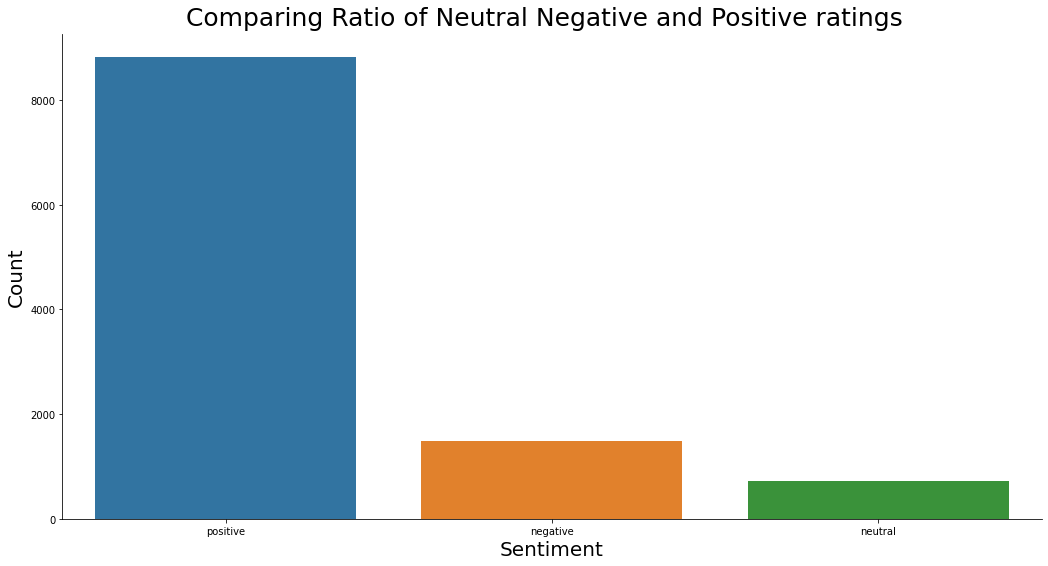

In [ ]:
#Distribution of sentiment across the dataset
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = df)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [ ]:
# Percentage of neutral, negative, positive words in train and test data
def pert_count(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100
print(f"Percentage of neutral words in train --> {pert_count(df, 'neutral')} %")
print(f"Percentage of negative words in train --> {pert_count(df, 'negative')} %")
print(f"Percentage of positive words in train --> {pert_count(df, 'positive')} %")

Percentage of neutral words in train --> 6.467706821480407 %
Percentage of negative words in train --> 13.50689404934688 %
Percentage of positive words in train --> 80.02539912917271 %


### Words and word clouds

In [ ]:
# Most repeated words in reviews
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df[df["classes"] == "neutral"]["cleaned_reviews"]
neg=df[df["classes"] == "negative"]["cleaned_reviews"]
pos=df[df["classes"] == "positive"]["cleaned_reviews"]

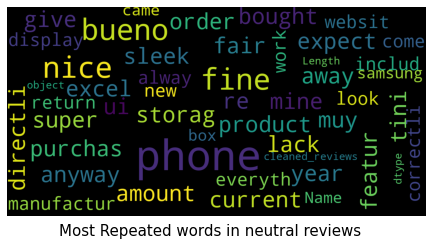

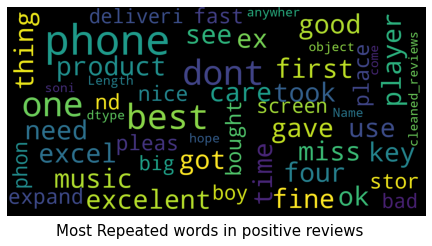

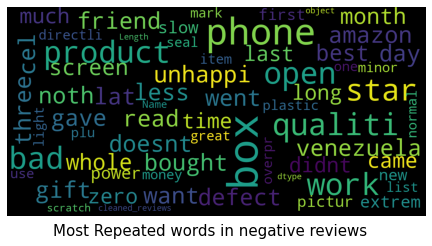

In [ ]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

### Most Popular words in the dataset

In [ ]:
# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]# apply function above 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


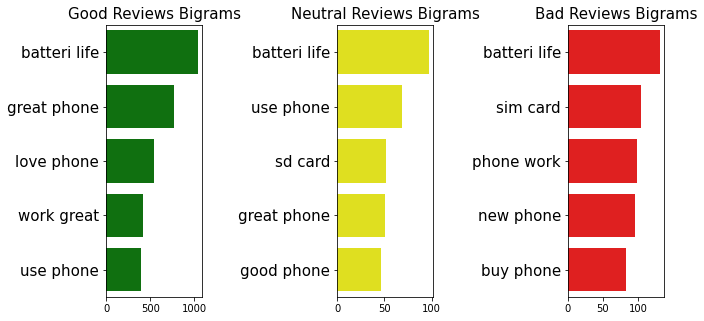

In [ ]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 5)
common_words_neutral= get_top_n_bigram(neu, 5)
common_words_bad= get_top_n_bigram(neg, 5)

# bigram plot using function above
plt.figure(figsize=(10,5))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')
plt.show()

### Sentiment Distribution

In [ ]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head()

,Unnamed: 0_x,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0_y,Unnamed: 0.1,category,also_buy,image,brand,feature,rank,also_view,details,similar_item,price,classes,y,cleaned_reviews,sentiment
0,21613,4.0,A1ICOB5XZ9GK3R,i gave it a four because when i first got it i...,Blackberry Rim 8520,POSITIVE,2009-09-06,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,gave four first got took time see get use key ...,0.124242
1,21614,5.0,A2O0XNK7T4KASU,good,Good,POSITIVE,2017-08-17,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,good,0.700000
2,21615,5.0,A3CB1J66JA929L,ok,Five Stars,POSITIVE,2017-07-14,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,ok,0.500000
3,21616,5.0,A1H8OJ4PPV9R12,excelente,Five Stars,NEGATIVE,2017-02-16,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,excelent,0.000000
4,21617,1.0,A2H6U09YBWFYPJ,unhappy with the product is not what i want a...,One Star,NEGATIVE,2016-12-24,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,negative,0,unhappi product want read amazon,0.000000


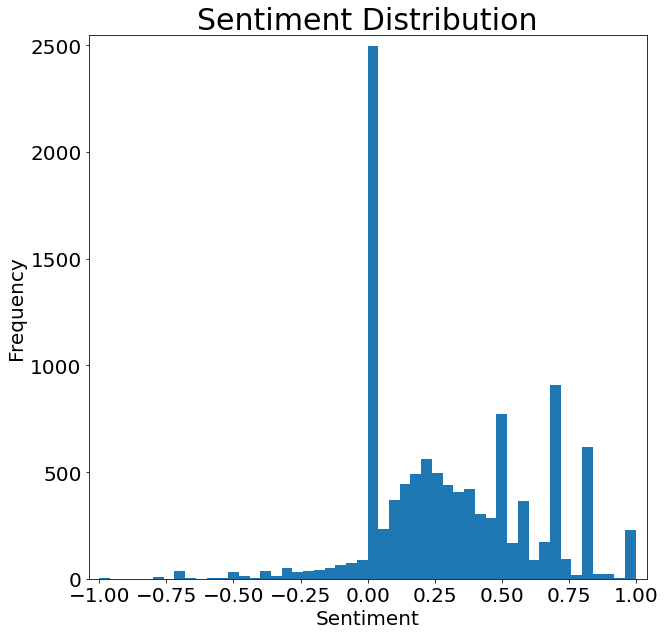

In [ ]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(10,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

We can conclude that there's more reviews that look neutral exist in our dataset than there are positive or negative reviews. We also see that people tend to put in reviews only when its positive or when its neutral and they barely bother to put up a review when its a really bad product.

### **Correlation heatmap to analyse the dependence between review length and sentiment**

It is a known fact that individuals tend to rant more about a product than they would praise a product. The following correlation heatmap further proves that face, there's a negative correlation between review length and the sendiment indicating negative reviews tend to be longer than positive or neutral ones.

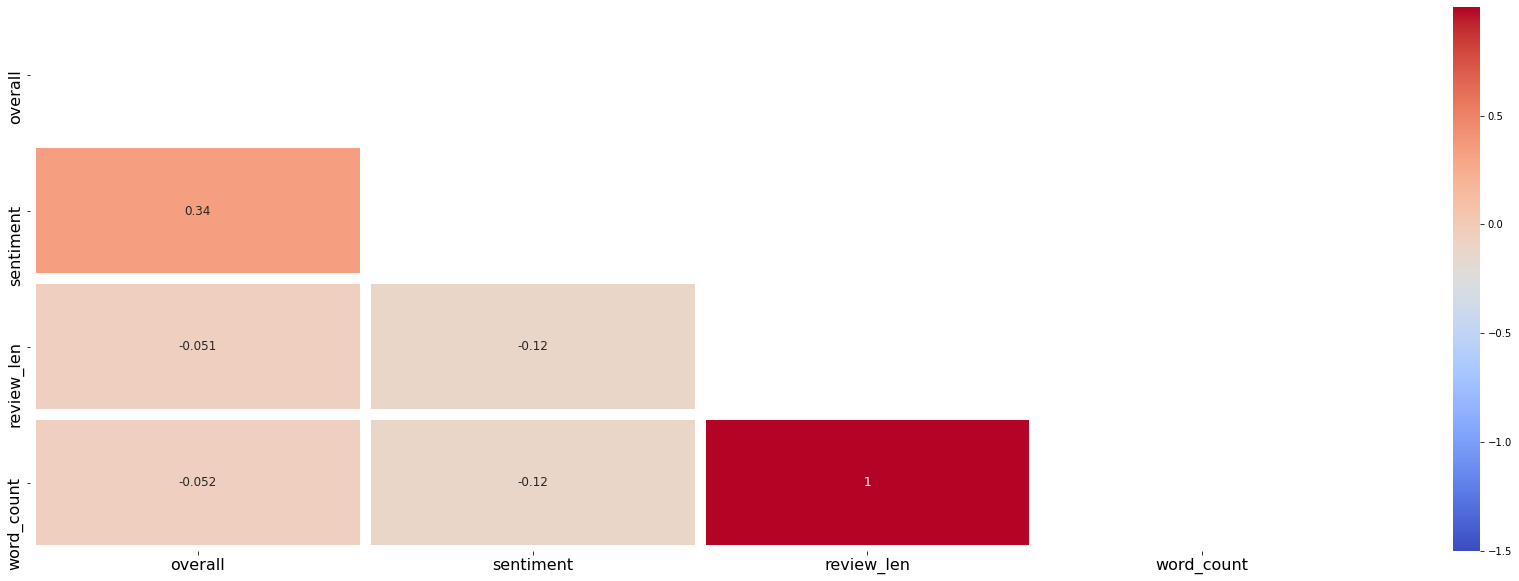

In [ ]:
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["reviewText"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)

## Sentiment Classification Engine

In [ ]:
#Libraries for Tokenization
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
#Libraries to implement Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
#Libraries to implement and optimize Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#To create Pipelines and select best feautures before passing through the model
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
#Pre-processing and NLP libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")
import nltk
import re
import string
#Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Tokenization methods to break down text into tokens(words)
#Using TF-IDF with ngram range of (1,1)
tfidf_vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
#Using Bag of Words with ngram range of (1,1)
counter_vectorizer = CountVectorizer(ngram_range=(1,1))

In [ ]:
#Seperating test-train with standard 80-20 split
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
X_train_class = df_train["cleaned_reviews"]
Y_train_class = df_train["y"]
X_test_class = df_test["cleaned_reviews"]
Y_test_class = df_test["y"]


In [ ]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
#text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(criterion='entropy')),])
text_clf_classifier2 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=11)),])
text_clf_classifier4 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=11)),])

In [ ]:
#Function to execute and run Model Pipelines and display Model Paramaters used along with Accuracy
def run_model(text_clf_classifier):
  print(text_clf_classifier)
  classifier_model = text_clf_classifier.fit(X_train_class,Y_train_class)
  print(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

Random Forest Classifier Paramteres tuned ->

*   No of estimators - No. of trees - 100,
*   Information Gain criteria - Entropy & Gini Index : Gini Index gives better accuracy.
*Cost complexity pruning paramter - 0.0(No pruning)


In [ ]:
print("Random Forest Classifier - Count Vectorizer:")
run_model(text_clf_classifier1)

Random Forest Classifier - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_s

Naive Bayes methods
* Learning Rate Variants : 0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15
* Best Results were given by alpha=11 for Counter Vectorizer for Tokenization

In [ ]:
#Running Multinomial Naive Bayes - Counter Vertorizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))


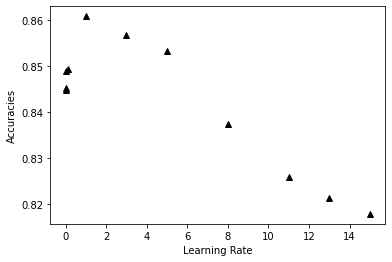

[0.8453014184397163, 0.8448581560283688, 0.8488475177304965, 0.849290780141844, 0.8608156028368794, 0.8568262411347518, 0.8532801418439716, 0.837322695035461, 0.8257978723404256, 0.8213652482269503, 0.8178191489361702]


In [ ]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
print("Multinomial Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier2)

Multinomial Naive Bayes - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7f11b57db950>)),
                ('clf',
                 MultinomialNB(alpha=11, class_prior=None, fit_prior=True))],
         verbose=False)
0.8257978723404256


In [ ]:
print("Bernoulli Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier4)

Bernoulli Naive Bayes - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7f11b57db950>)),
                ('clf',
                 BernoulliNB(alpha=11, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         ver

In [ ]:
def prediction(review):
  prediction_df = pd.DataFrame([[review,0]],columns = ["reviewText","y"])
  prediction_df = text_process(prediction_df)
  classifier_prediction = classifier_model.predict(prediction_df["cleaned_reviews"])
  return classifier_prediction[0]

In [ ]:
prediction("works good, viewing angle critical for good picture. purchased for use in a rv so the size was perfect for the location")

2

In [ ]:
df.to_csv('/content/drive/MyDrive/Web and social media analytics/Capstone/final_result_for_capstone.csv')